In [1]:
import numpy as np
from cvxopt import solvers, matrix, spmatrix, spdiag, sparse
import matplotlib.pyplot as plt
from softsvm import softsvm, predict, get_random_sample, error
data = np.load('ex2q2_mnist.npz', allow_pickle=True)
# unlimited np output
# np.set_printoptions(threshold=np.inf)
trainX, testX = data['Xtrain'], data['Xtest']
trainY, testY = data['Ytrain'], data['Ytest']

In [2]:
def get_single_error(m, l):
    """
    :param m: sample size
    :param l: the parameter lambda of the soft SVM algorithm
    :return: linear predictor w, a numpy array of size (d, 1)
    """
    _trainX, _trainY = get_random_sample(m, trainX, trainY)
    w = softsvm(l, _trainX, _trainY)

    train_error = error(_trainY, predict(w, _trainX).flatten())
    
    test_error = error(testY, predict(w, testX).flatten())

    return (train_error, test_error)

In [3]:
def get_avg_error(m: int, log_lambdas: np.array, times: int):
    """
    :param m: sample size
    :param lambdas: the parameter lambda of the soft SVM algorithm, numpy array
    :param times: number of times to test for each lambda
    :return: dictionary of all the calculated values
    """
    lambdas = np.power(10, log_lambdas)
    
    # errors.shape == (l, times)
    # errors[i][j][0] = train error of the j'th time we ran the expirement with lambdas[i]
    # errors[i][j][1] = test error of the j'th time we ran the expirement with lambdas[i]
    errors = np.array([[get_single_error(m, l) for i in range(times)] for l in lambdas])
    train_errors = errors[:,:,0]
    test_errors = errors[:,:,1]

    # train_min_values[i] is the minimum train error with lambas[i]
    train_min_values = np.min(train_errors, axis=1)
    train_max_values = np.max(train_errors, axis=1)
    train_avg_values = np.mean(train_errors, axis=1)
    test_min_values = np.min(test_errors, axis=1)
    test_max_values = np.max(test_errors, axis=1)
    test_avg_values = np.mean(test_errors, axis=1)

    return {
        "log_lambdas": log_lambdas,
        "train_min_values": train_min_values,
        "train_max_values": train_max_values,
        "train_avg_values": train_avg_values,
        "test_min_values": test_min_values,
        "test_max_values": test_max_values,
        "test_avg_values": test_avg_values
        }


In [44]:
def plot(exp1_calc: dict, exp2_calc: dict, title: str):

    plt.figure(figsize=(10, 4))
    ax = plt.axes()
    ax.set(xlabel="log λ", ylabel="error",
           title=title,
           xticks=exp1_calc["log_lambdas"])
    # first experiment
    capsize, alpha = 3, 0.8
    plt.errorbar(x=exp1_calc["log_lambdas"] + 0.025, y=exp1_calc["train_avg_values"],
                 yerr=[exp1_calc["train_min_values"],
                       exp1_calc["train_max_values"]],
                 label="Train sample average error", capsize=capsize, alpha=alpha)

    plt.errorbar(x=exp1_calc["log_lambdas"] - 0.025, y=exp1_calc["test_avg_values"],
                 yerr=[exp1_calc["test_min_values"],
                       exp1_calc["test_max_values"]],
                 label="Test sample average error", capsize=capsize, alpha=alpha)

    # second experiment
    plt.scatter(exp2_calc["log_lambdas"], exp2_calc["train_avg_values"], label="Train error")
    plt.scatter(exp2_calc["log_lambdas"], exp2_calc["test_avg_values"], label="Test error")
    plt.legend(loc="best")


Run two experiments on this data set.
In the first experiment:
     use a sample size of 100.
To generate this small sample, draw it randomly from the provided training sample. Repeat the “small sample”
experiment 10 times, and when you report the results, average over these 10 experiments, and plot
also error bars which show the maximum and minimum values you got over all experiments.
Run your soft-SVM implementation with each of the following values of λ: λ = 10^n , for n ∈ {1, . . . , 10}.

In [46]:
experiment1 = get_avg_error(100, np.arange(1,11), 10)
experiment2 = get_avg_error(1000, [1, 3, 5, 8], 1)

     pcost       dcost       gap    pres   dres
 0: -9.0119e-03  1.0010e+00  2e+02  1e+00  7e+04
 1:  9.7145e-01 -1.9796e+00  3e+00  1e-02  7e+02
 2:  2.6739e-01 -2.3264e-02  3e-01  3e-04  1e+01
 3:  5.7274e-02 -3.7354e-03  6e-02  5e-05  2e+00
 4:  1.3325e-02 -2.8913e-04  1e-02  1e-05  5e-01
 5:  1.7320e-03  6.0447e-04  1e-03  5e-07  3e-02
 6:  8.1386e-04  6.9284e-04  1e-04  5e-08  3e-03
 7:  7.2137e-04  7.0806e-04  1e-05  4e-09  2e-04
 8:  7.1107e-04  7.1054e-04  5e-07  9e-11  4e-06
 9:  7.1070e-04  7.1069e-04  1e-08  1e-12  6e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -8.6925e-03  1.0013e+00  2e+02  1e+00  7e+04
 1:  9.7180e-01 -1.9809e+00  3e+00  1e-02  7e+02
 2:  2.6985e-01 -2.4796e-02  3e-01  3e-04  1e+01
 3:  6.4064e-02 -4.3668e-03  7e-02  6e-05  3e+00
 4:  2.0220e-02 -7.2064e-04  2e-02  2e-05  8e-01
 5:  3.0099e-03  8.1281e-04  2e-03  1e-06  7e-02
 6:  1.1555e-03  9.6038e-04  2e-04  1e-07  5e-03
 7:  9.9839e-04  9.8079e-04  2e-05  8e-09  4e-0

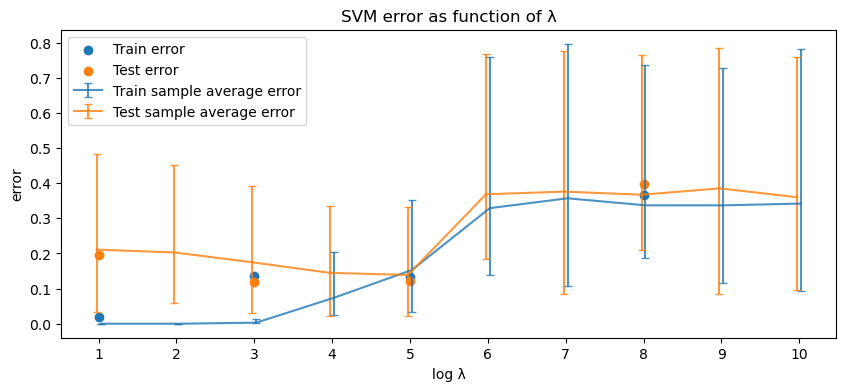

In [45]:
plot(experiment1, experiment2,  "SVM error as function of λ")

In the second experiment, use a sample size of 1000, which you should also draw randomly from the
training set. Run your soft-SVM implementation with each of the following values of λ: λ = 10n
,
for n ∈ {1, 3, 5, 8}. To make the running time feasible, you should run this experiment only once for
each value of λ.